In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance
# those are the basics. 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score
#to get the test train data split and then scale them. 

from keras.models import Sequential #sequential is a type of neutral network where the bottom layer feeds the layer infront. going in a sequential order
from keras.layers import Dense, LSTM #Dense is to create a layer of n neurons where all of the neurons in that layer will interact with all of the neuron in the bottom layer.
#- in every possible combination posssible. LSTM is the how those connections between those neurons will be used and calculated. 
#The model stuff. keras is based to be tensorflow where you can create new models

: 

[*********************100%***********************]  1 of 1 completed


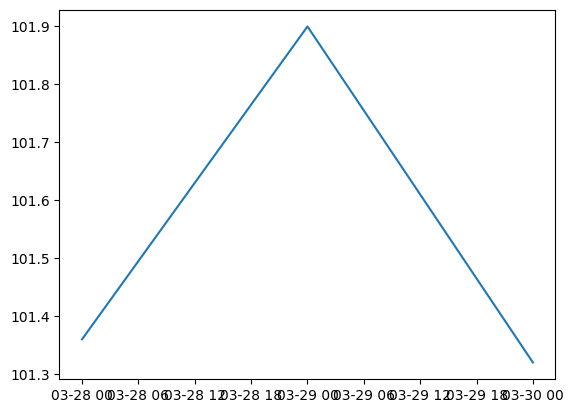

In [2]:
#first, get the data. 

t=str(input("Enter the name")) #this is the company name
p=str(input("Enter the period")) #how long you wanna get the data for? for maybe 3 days: 3d. For 3 years: 3y
i=str(input("Enter the interval")) #at what interval you want to get the data? for every 30 mins: 30m. (seconds are not possible)
df=yfinance.download(tickers=t, period=p, interval=i)

plt.plot(df['Close'])
plt.show()

In [ ]:
df.head()
#to see the data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-04 09:30:00,91.010002,91.239998,88.980003,89.050003,89.050003,3969365
2023-01-04 10:00:00,89.040001,89.610001,87.800003,88.099998,88.099998,2304488
2023-01-04 10:30:00,88.099998,88.830002,87.815002,88.589996,88.589996,2016441
2023-01-04 11:00:00,88.580002,88.889999,88.110001,88.889999,88.889999,1901635
2023-01-04 11:30:00,88.889999,89.459999,88.889999,89.245003,89.245003,1526667


In [16]:
#we intend to predict the close parameter.
#that will be our Y with all of the other columns being X
Y=df.filter(["Close"])
X=df.drop(['Close'],axis=1)

In [ ]:
Y #to see Y

,Close
Datetime,
2023-01-04 09:30:00,89.050003
2023-01-04 10:00:00,88.099998
2023-01-04 10:30:00,88.589996
2023-01-04 11:00:00,88.889999
2023-01-04 11:30:00,89.245003
...,...
2023-03-29 15:00:00,101.925003
2023-03-29 15:30:00,101.889999
2023-03-30 09:30:00,100.897499


In [ ]:
X #to see X

,Open,High,Low,Adj Close,Volume
Datetime,,,,,
2023-01-04 09:30:00,91.010002,91.239998,88.980003,89.050003,3969365
2023-01-04 10:00:00,89.040001,89.610001,87.800003,88.099998,2304488
2023-01-04 10:30:00,88.099998,88.830002,87.815002,88.589996,2016441
2023-01-04 11:00:00,88.580002,88.889999,88.110001,88.889999,1901635
2023-01-04 11:30:00,88.889999,89.459999,88.889999,89.245003,1526667
...,...,...,...,...,...
2023-03-29 15:00:00,101.839996,101.959999,101.720001,101.925003,2394131
2023-03-29 15:30:00,101.919998,102.084999,101.720398,101.889999,3092857
2023-03-30 09:30:00,101.440002,101.480003,100.290001,100.897499,4327822


In [17]:
#Now, have to turn the x and y from pandas to numpy. two functions can be used. (.values) or (.to_numpy())

X=X.values
Y=Y.values
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
#now, splitting the test and train date. You wish to have as much training data as possible with as little loss in the test data as possible. 
#so the test:train data ratio is very important. Now we are choosing 95%-5% ratio in train:test.

X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.05, random_state=10)

#tho this splits the data is an random way, we don't want that. we want it to be fairely ordered (the recent ones are test and the others are train).
#so a better way of ordering it could improve the loss. 

In [ ]:
Y_train
#That is the current y of train

array([[ 91.98500061],
       [106.08000183],
       [ 96.9138031 ],
       [105.07499695],
       [ 91.0861969 ],
       [ 92.45999908],
       [ 94.12999725],
       [ 99.04000092],
       [105.64499664],
       [ 95.23149872],
       [ 92.69999695],
       [ 95.44999695],
       [ 89.23000336],
       [105.67500305],
       [ 91.79000092],
       [ 90.69000244],
       [108.01000214],
       [ 94.41899872],
       [ 91.86000061],
       [ 91.68499756],
       [ 96.77999878],
       [101.23000336],
       [ 93.82990265],
       [106.25      ],
       [ 96.70999908],
       [105.05000305],
       [104.84989929],
       [ 90.05999756],
       [ 96.62999725],
       [ 98.55000305],
       [103.11000061],
       [ 99.41999817],
       [105.52999878],
       [ 92.86009979],
       [ 95.06999969],
       [ 86.84210205],
       [102.05000305],
       [ 93.83000183],
       [103.5       ],
       [ 99.6875    ],
       [ 96.30909729],
       [ 91.80999756],
       [ 94.15499878],
       [ 92

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
Y_train=scaler.fit_transform(Y_train)
y_val=scaler.fit(Y_val)

#that just scales the Y values. 

In [ ]:
Y_train #now

array([[0.26539961],
       [0.88117076],
       [0.4807252 ],
       [0.83726491],
       [0.22613339],
       [0.28615097],
       [0.35910851],
       [0.57361283],
       [0.8621666 ],
       [0.40723003],
       [0.2966358 ],
       [0.4167756 ],
       [0.14504149],
       [0.8634775 ],
       [0.25688062],
       [0.20882477],
       [0.96548707],
       [0.37173418],
       [0.25993871],
       [0.25229332],
       [0.47487966],
       [0.6692879 ],
       [0.34599822],
       [0.8885975 ],
       [0.47182157],
       [0.836173  ],
       [0.82743102],
       [0.18130162],
       [0.46832651],
       [0.55220619],
       [0.75141972],
       [0.59021384],
       [0.85714267],
       [0.30363025],
       [0.40017459],
       [0.04072077],
       [0.70511139],
       [0.34600255],
       [0.7684577 ],
       [0.60190025],
       [0.45430729],
       [0.25775422],
       [0.36020076],
       [0.29488861],
       [0.34862368],
       [0.66535588],
       [0.18829173],
       [0.197

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
#that is the bottom layer and it goes further and further. 
#return sequences being true means all of the hidden weights and baises will move to the next layer. 
#if it is set to false, then it won't and only the true output from that layer will move to the next layer. 
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
#optimizer is how you train the data. usually you would use gradient descent to update the parameters. 
#adam is another option which is pretty much gradient descent based on the loss function but it's a bit better and works a bit differnetly. 
#and the loss is the function. 

# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)
#batch size is explained simply with an example. 
#lets say you are going to train 100 records and the batchsize is 10. you would take the first 10 and then train it and then move to the next 10. 
#so you would end up with 10 mini samples. 
#epochs is how many times you are going thru train data again and again. 

731/731 [==============================] - 10s 7ms/step - loss: 0.0171


In [ ]:
#so you have a trained model now. so you are now testing. 
predictions = model.predict(X_val)

#the prediction for the model rn is now in scaled model. so you are rescaling it backwards
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 11ms/step


In [ ]:
predictions
#that is the predicted values


array([[ 97.891014],
       [ 91.72512 ],
       [100.02089 ],
       [100.04446 ],
       [ 98.81483 ],
       [ 95.62028 ],
       [ 99.79273 ],
       [103.80701 ],
       [ 94.449135],
       [ 90.410286],
       [ 99.576195],
       [ 98.58221 ],
       [ 93.37246 ],
       [ 97.64566 ],
       [ 87.48503 ],
       [ 94.69228 ],
       [ 93.69722 ],
       [ 99.03341 ],
       [ 86.00714 ],
       [ 90.41154 ],
       [ 91.954155],
       [ 94.15011 ],
       [ 90.26905 ],
       [ 95.61079 ],
       [ 94.68392 ],
       [ 90.706184],
       [ 91.198204],
       [ 91.474594],
       [ 86.86299 ],
       [ 94.60825 ],
       [100.22745 ],
       [103.984886],
       [ 97.56971 ],
       [ 96.27156 ],
       [ 99.70536 ],
       [ 89.97267 ],
       [ 95.679756],
       [ 95.07821 ],
       [104.12822 ]], dtype=float32)

In [ ]:
Y_val
#that is the true value

array([[ 98.44000244],
       [ 91.62000275],
       [100.70999908],
       [101.19999695],
       [ 99.62999725],
       [ 95.98000336],
       [100.30000305],
       [106.06999969],
       [ 94.23989868],
       [ 90.55000305],
       [100.41000366],
       [ 99.34760284],
       [ 93.53119659],
       [ 98.17500305],
       [ 88.41000366],
       [ 95.10749817],
       [ 93.80000305],
       [ 99.66139984],
       [ 86.45999908],
       [ 90.58499908],
       [ 91.84999847],
       [ 94.11000061],
       [ 90.45999908],
       [ 95.98500061],
       [ 94.76000214],
       [ 90.84500122],
       [ 91.41000366],
       [ 91.75039673],
       [ 87.19000244],
       [ 94.77999878],
       [101.29000092],
       [106.90000153],
       [ 97.66999817],
       [ 96.54000092],
       [100.63500214],
       [ 90.23500061],
       [ 95.95999908],
       [ 95.16000366],
       [106.58499908]])

In [ ]:
print(r2_score(Y_val, predictions))
#that is the r2 score. mulitplication of that value with 100 will give you the percentage value of accuracy. the closer this is to 1 is better. 
print(np.sqrt(np.mean(((predictions - Y_val) ** 2))))
#now you that is the mean square error value. the lower this is, the better. 

0.9709508798486677
0.8600425273234142


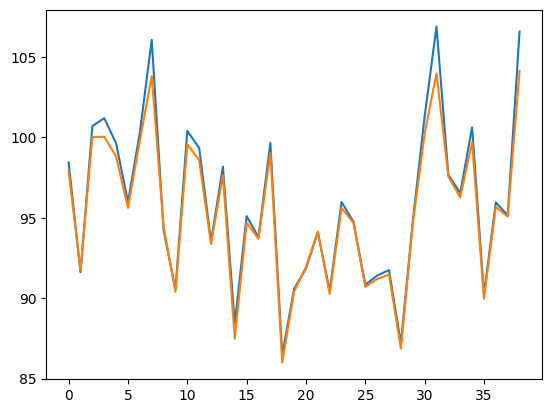

In [ ]:
plt.plot(Y_val)
plt.plot(predictions)



In [ ]:
todays_GOOG_Data=np.array([[101.44,	101.48,	100.30,	101.08,	8845633]])
#So the close price is not on the dataframe and then adj-close which depends on the close price is being predicted by professions who provided this data

In [ ]:
todays_GOOG_Data

array([[1.014400e+02, 1.014800e+02, 1.003000e+02, 1.010800e+02,
        8.845633e+06]])

In [ ]:
todays_prediction=model.predict(todays_GOOG_Data)
todays_prediction=scaler.inverse_transform(todays_prediction)

1/1 [==============================] - 0s 27ms/step


In [ ]:
todays_prediction

array([[100.07256]], dtype=float32)

The predicted value is 100.072. The current predicted value by the professions is 101.29. Both could be wrong. (at 8:45pm ist) We would only know by the end of the US-Trading day.

Note, finding the value using the without the adj-close is even better actually, so maybe retraining the data to work without the adj-close or making it able to test and predict the value without adj-close is a better option. Tho there might be some loss in accuary. 

In [ ]:
yd=np.array([[102.72,	102.82,	101.03	,101.90	,26129700]])
ydp=model.predict(yd)
print(scaler.inverse_transform(ydp))

#that data is for 29th (yesterday.)
#the predicted value is 100.853 and the true value is 101.90	

1/1 [==============================] - 0s 25ms/step
[[100.85342]]


In [ ]:
yd=np.array([[102.72,	102.82,	101.03,26129700]])
ydp=model.predict(yd)
print(scaler.inverse_transform(ydp))
#that is the yesterday's dataset without the adj-close. (29th)
#the value predicted is 103.98. which has a bigger loss. But our model is trained to work with the adj-close. So this is no that bad. Retraining might help. 

#Play with the parameters and stuff and find out. ML engineering is basically 'the more you fuck around, the more you find out' case study. 

1/1 [==============================] - 0s 26ms/step
[[103.98698]]
